In [1]:
import FinanceDataReader as fdr
from pykrx import stock
import pandas_datareader.data as pdr
import yfinance as yf

from pykrx import stock
import pandas as pd
from datetime import datetime
from pandas_datareader import data as pdr

# 시작일과 종료일 설정
start_date = "2022-01-01"
end_date = "2024-11-20"

# pykrx로 상장된 종목코드와 이름 가져오기
tickers = stock.get_market_ticker_list(market="KOSPI")
ticker_info = {ticker: stock.get_market_ticker_name(ticker) for ticker in tickers}

# 데이터프레임 초기화
stock_data_list = []

# 각 종목의 주식 데이터 가져오기 (pykrx 사용)
for ticker, name in ticker_info.items():
    try:
        # 특정 종목의 주식 데이터 가져오기
        df_krx = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)
        
        # 필요한 정보 추출 (시가, 고가, 저가, 종가, 거래량)
        df_krx = df_krx[['시가', '고가', '저가', '종가', '거래량']].reset_index()
        df_krx['ticker'] = ticker
        df_krx['name'] = name
        df_krx.rename(columns={'시가': 'open', '고가': 'high', '저가': 'low', '종가': 'close', '거래량': 'volume', '날짜': 'date'}, inplace=True)

        # 결과를 리스트에 추가
        stock_data_list.append(df_krx)

    except Exception as e:
        print(f"Error retrieving data for ticker {ticker}: {e}")

# 모든 데이터를 하나의 데이터프레임으로 결합
if stock_data_list:
    df_stock_data = pd.concat(stock_data_list, ignore_index=True)
else:
    df_stock_data = pd.DataFrame(columns=['date', 'ticker', 'name', 'open', 'high', 'low', 'close', 'volume'])

# 고유 종목 코드와 종목명만 확인
unique_stocks = df_stock_data[['ticker', 'name']].drop_duplicates().reset_index(drop=True)

# 종목 코드와 이름 간략 조회
print("코스피 종목 코드 및 이름 조회:")
print(unique_stocks)

# 데이터프레임의 간단한 요약 정보 확인
df_summary = df_stock_data.describe(include='all')
print("\n데이터프레임 요약 정보:")
print(df_summary)

# 코스피 지수 데이터를 가져와 데이터프레임으로 저장
kospi_index = stock.get_index_ohlcv_by_date(start_date, end_date, "1001")[['종가']].dropna()
# 인덱스 초기화를 하지 않고 유지합니다 (시계열 분석을 위해 날짜 인덱스 유지)
print("\n코스피 지수 종가 데이터:")
print(kospi_index)


# df_stock_data의 'date' 칼럼을 datetime 형식으로 변환 후 'YYYYMMDD' 형식의 문자열로 변환
df_stock_data['date'] = pd.to_datetime(df_stock_data['date']).dt.strftime('%Y%m%d')

# 모든 'date' 데이터를 CSV로 내보내기
date_column_df = df_stock_data[['date']]
date_column_df.to_csv('date_column_data.csv', index=False)  # 'date_column_data.csv'라는 이름으로 저장

import pandas as pd

# kospi_index 데이터프레임의 칼럼명 출력
print(kospi_index.columns)

# 칼럼명이 'a'인 데이터만 선택하여 CSV로 내보내기
a_column_df = kospi_index[['a']]
a_column_df.to_csv('a_column_data.csv', index=False)  # 'a_column_data.csv'라는 이름으로 저장



코스피 종목 코드 및 이름 조회:
     ticker     name
0    095570   AJ네트웍스
1    006840    AK홀딩스
2    027410      BGF
3    282330   BGF리테일
4    138930  BNK금융지주
..      ...      ...
954  079980      휴비스
955  005010      휴스틸
956  000540     흥국화재
957  000545    흥국화재우
958  003280     흥아해운

[959 rows x 2 columns]

데이터프레임 요약 정보:


C:\TempFolder\ipykernel_27344\737036754.py:54: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_summary = df_stock_data.describe(include='all')


                       date          open          high           low  \
count                665068  6.650680e+05  6.650680e+05  6.650680e+05   
unique                  708           NaN           NaN           NaN   
top     2024-11-20 00:00:00           NaN           NaN           NaN   
freq                    959           NaN           NaN           NaN   
first   2022-01-03 00:00:00           NaN           NaN           NaN   
last    2024-11-20 00:00:00           NaN           NaN           NaN   
mean                    NaN  3.766532e+04  3.827285e+04  3.706089e+04   
std                     NaN  7.878980e+04  8.001713e+04  7.755297e+04   
min                     NaN  0.000000e+00  0.000000e+00  0.000000e+00   
25%                     NaN  4.060000e+03  4.135000e+03  4.000000e+03   
50%                     NaN  1.132000e+04  1.153000e+04  1.114000e+04   
75%                     NaN  3.630000e+04  3.690000e+04  3.575000e+04   
max                     NaN  1.486000e+06  1.543000

KeyError: "None of [Index(['a'], dtype='object', name='코스피')] are in the [columns]"

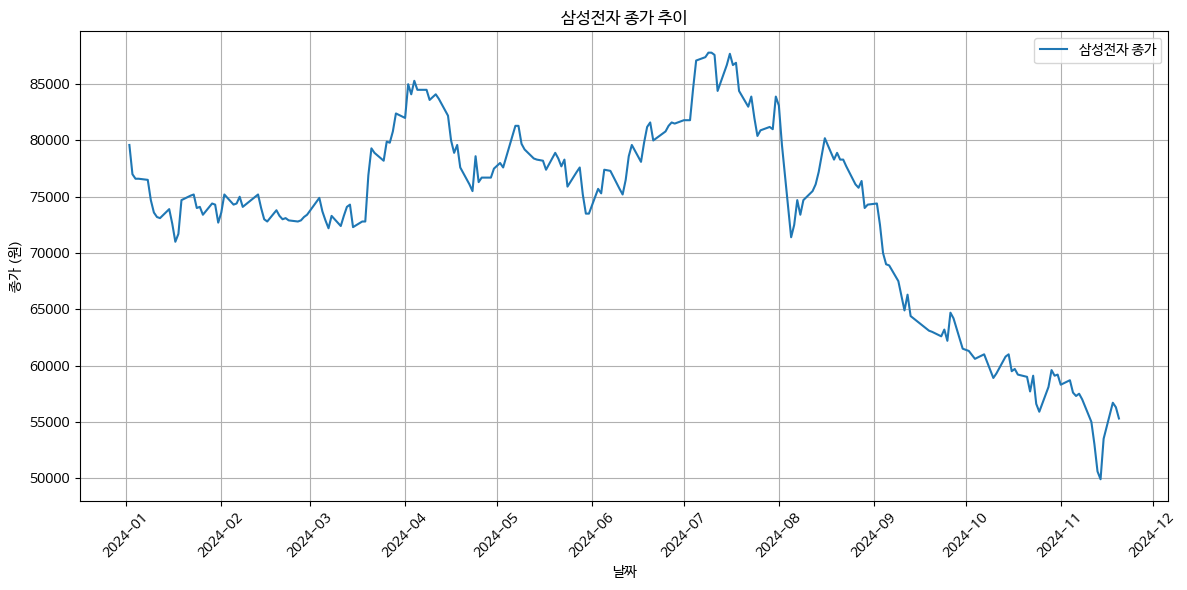

In [4]:
import matplotlib.pyplot as plt

# 삼성전자 종목 코드 (005930)
ticker = '005930'
name = '삼성전자'

start_date = "2024-01-01"
end_date = "2024-11-20"


# 특정 종목의 주식 데이터 가져오기 (pykrx 사용)
try:
    df_krx = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)
    
    # 필요한 정보만 추출
    df_krx = df_krx[['종가']].reset_index()
    df_krx['ticker'] = ticker
    df_krx['name'] = name
    df_krx.rename(columns={'종가': 'close', '날짜': 'date'}, inplace=True)

    # 그래프로 출력
    plt.figure(figsize=(12, 6))
    plt.plot(df_krx['date'], df_krx['close'], label='삼성전자 종가')
    plt.title('삼성전자 종가 추이')
    plt.xlabel('날짜')
    plt.ylabel('종가 (원)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    

except Exception as e:
    print(f"Error retrieving data for ticker {ticker}: {e}")

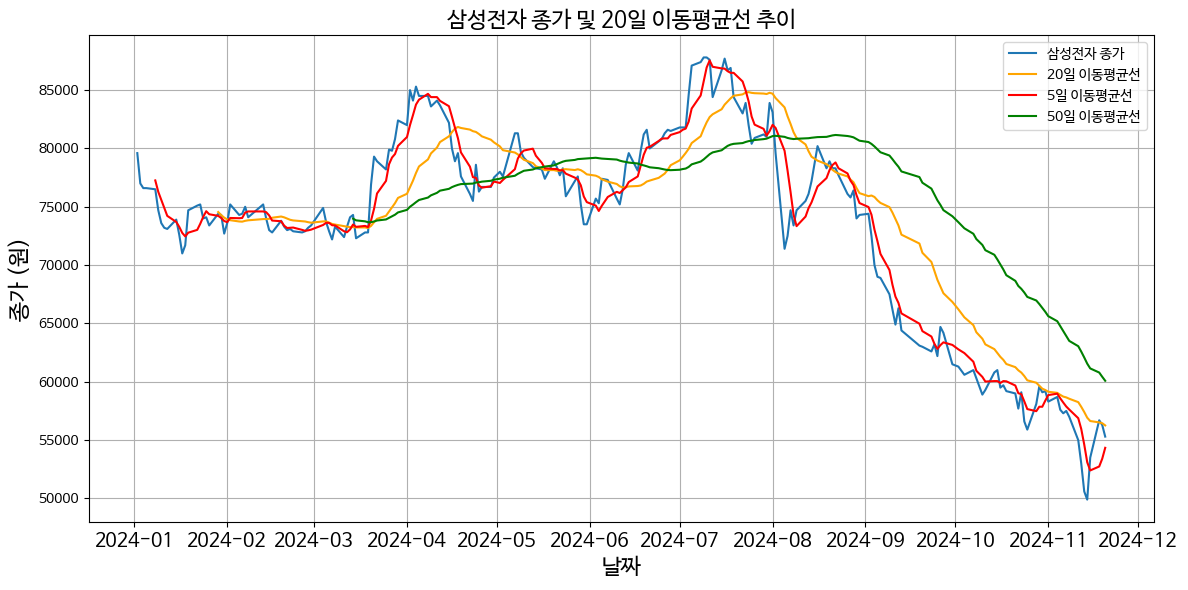

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# 삼성전자 종목 코드 (005930)
ticker = '005930'
name = '삼성전자'

start_date = "2024-01-01"
end_date = "2024-11-20"

# 특정 종목의 주식 데이터 가져오기 (pykrx 사용)
try:
    df_krx = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)
    
    # 필요한 정보만 추출
    if '종가' in df_krx.columns:
        df_krx = df_krx[['종가']]
    elif 'Close' in df_krx.columns:
        df_krx = df_krx[['Close']]
    df_krx = df_krx.reset_index()
    df_krx['ticker'] = ticker
    df_krx['name'] = name
    df_krx.rename(columns={'종가': 'close', '날짜': 'date', 'Close': 'close', 'Date': 'date'}, inplace=True)
    
    # 이동평균선 추가 (20일)
    df_krx['moving_average_50'] = df_krx['close'].rolling(window=50).mean()
    df_krx['moving_average_20'] = df_krx['close'].rolling(window=20).mean()
    df_krx['moving_average_5'] = df_krx['close'].rolling(window=5).mean()

    # 그래프로 출력
    plt.figure(figsize=(12, 6))
    plt.plot(df_krx['date'], df_krx['close'], label='삼성전자 종가')
    plt.plot(df_krx['date'], df_krx['moving_average_20'], label='20일 이동평균선', color='orange')
    plt.plot(df_krx['date'], df_krx['moving_average_5'], label='5일 이동평균선', color='red')
    plt.plot(df_krx['date'], df_krx['moving_average_50'], label='50일 이동평균선', color='green')
    plt.title('삼성전자 종가 및 20일 이동평균선 추이', fontsize = 16)
    plt.xlabel('날짜', fontsize = 16)
    plt.ylabel('종가 (원)', fontsize = 16)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=0, fontsize = 14)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error retrieving data for ticker {ticker}: {e}")


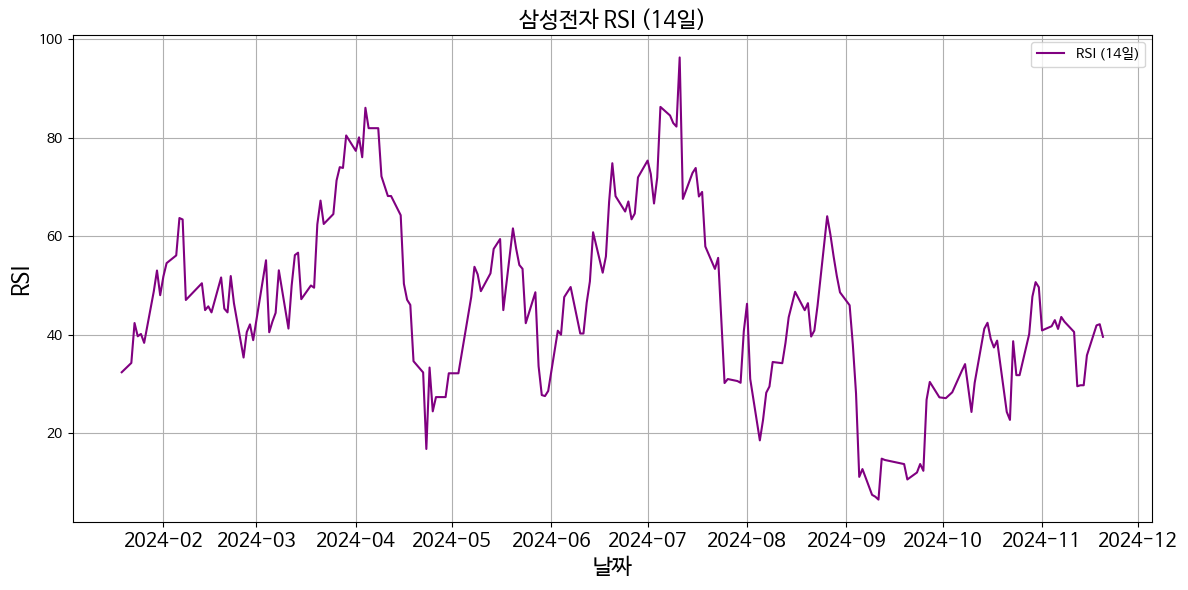

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# 삼성전자 종목 코드 (005930)
ticker = '005930'
name = '삼성전자'

start_date = "2024-01-01"
end_date = "2024-11-20"

# 특정 종목의 주식 데이터 가져오기 (pykrx 사용)
try:
    df_krx = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)
    
    # 필요한 정보만 추출
    if '종가' in df_krx.columns:
        df_krx = df_krx[['종가']]
    elif 'Close' in df_krx.columns:
        df_krx = df_krx[['Close']]
    df_krx = df_krx.reset_index()
    df_krx['ticker'] = ticker
    df_krx['name'] = name
    df_krx.rename(columns={'종가': 'close', '날짜': 'date', 'Close': 'close', 'Date': 'date'}, inplace=True)

    # RSI 추가 (14일)
    delta = df_krx['close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()

    rs = avg_gain / avg_loss
    df_krx['RSI'] = 100 - (100 / (1 + rs))

    # 그래프로 출력
    plt.figure(figsize=(12, 6))
    plt.plot(df_krx['date'], df_krx['RSI'], label='RSI (14일)', color='purple')
    plt.title('삼성전자 RSI (14일)', fontsize=16)
    plt.xlabel('날짜', fontsize=16)
    plt.ylabel('RSI', fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=0, fontsize=14)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error retrieving data for ticker {ticker}: {e}")


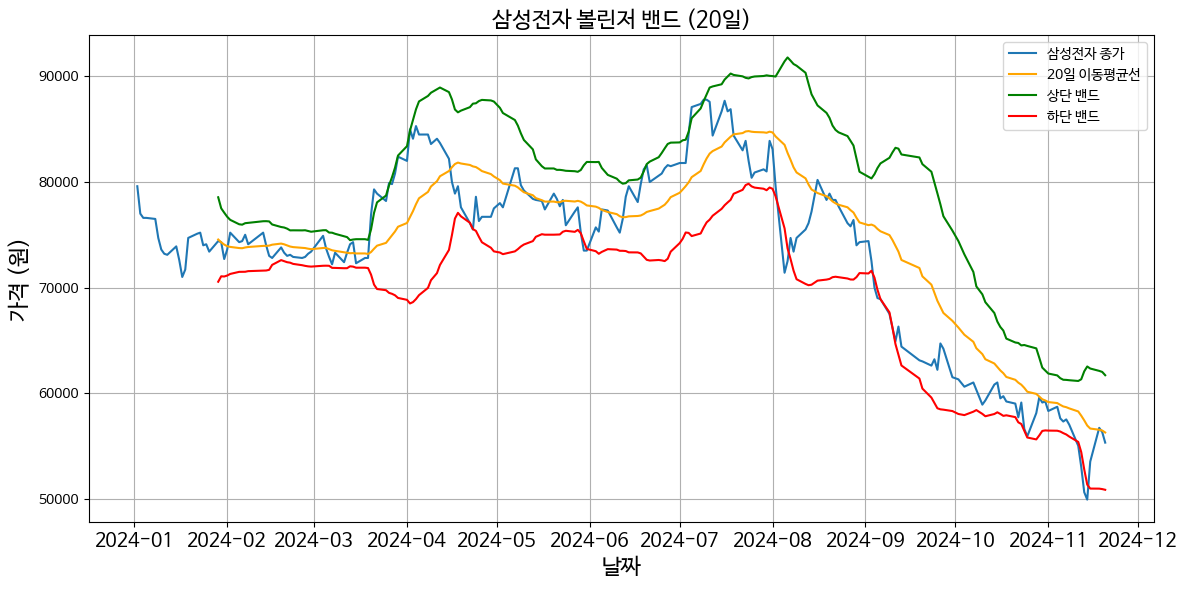

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# 삼성전자 종목 코드 (005930)
ticker = '005930'
name = '삼성전자'

start_date = "2024-01-01"
end_date = "2024-11-20"

# 특정 종목의 주식 데이터 가져오기 (pykrx 사용)
try:
    df_krx = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)
    
    # 필요한 정보만 추출
    if '종가' in df_krx.columns:
        df_krx = df_krx[['종가']]
    elif 'Close' in df_krx.columns:
        df_krx = df_krx[['Close']]
    df_krx = df_krx.reset_index()
    df_krx['ticker'] = ticker
    df_krx['name'] = name
    df_krx.rename(columns={'종가': 'close', '날짜': 'date', 'Close': 'close', 'Date': 'date'}, inplace=True)

    # 볼린저 밴드 추가 (20일 이동평균, 상단 밴드, 하단 밴드)
    df_krx['moving_average_20'] = df_krx['close'].rolling(window=20).mean()
    df_krx['upper_band'] = df_krx['moving_average_20'] + 2 * df_krx['close'].rolling(window=20).std()
    df_krx['lower_band'] = df_krx['moving_average_20'] - 2 * df_krx['close'].rolling(window=20).std()

    # 그래프로 출력
    plt.figure(figsize=(12, 6))
    plt.plot(df_krx['date'], df_krx['close'], label='삼성전자 종가')
    plt.plot(df_krx['date'], df_krx['moving_average_20'], label='20일 이동평균선', color='orange')
    plt.plot(df_krx['date'], df_krx['upper_band'], label='상단 밴드', color='green')
    plt.plot(df_krx['date'], df_krx['lower_band'], label='하단 밴드', color='red')
    plt.title('삼성전자 볼린저 밴드 (20일)', fontsize=16)
    plt.xlabel('날짜', fontsize=16)
    plt.ylabel('가격 (원)', fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=0, fontsize=14)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error retrieving data for ticker {ticker}: {e}")


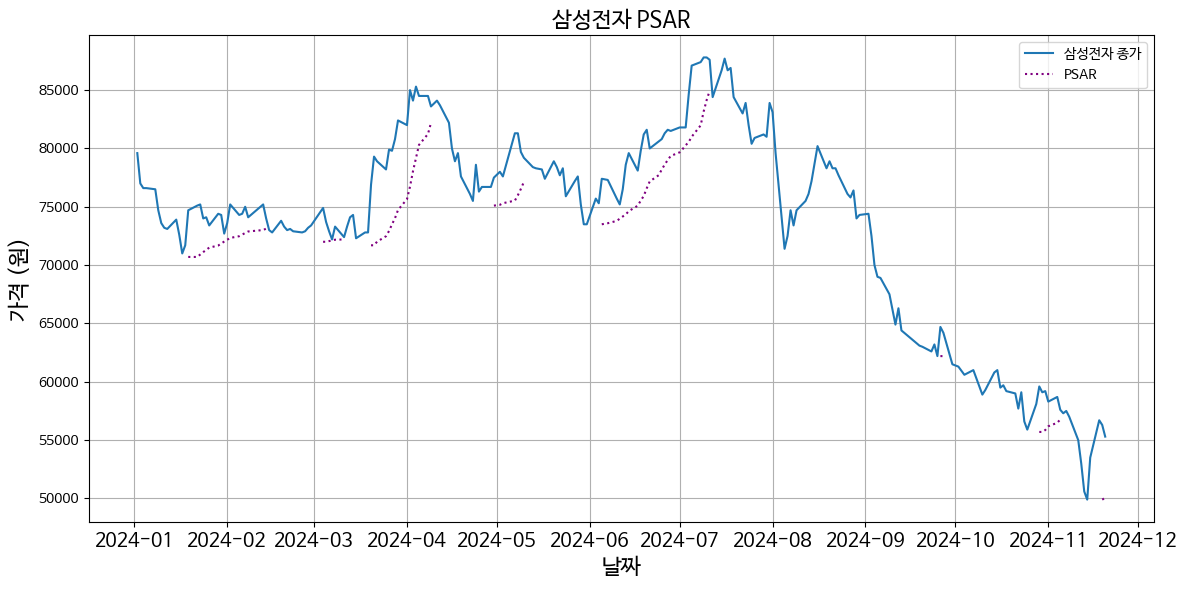

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import pandas_ta as ta

# 삼성전자 종목 코드 (005930)
ticker = '005930'
name = '삼성전자'

start_date = "2024-01-01"
end_date = "2024-11-20"

# 특정 종목의 주식 데이터 가져오기 (pykrx 사용)
try:
    df_krx = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)
    
    # 필요한 정보만 추출
    if {'종가', '고가', '저가', '시가'} <= set(df_krx.columns):
        df_krx = df_krx[['종가', '고가', '저가', '시가']]
    elif {'Close', 'High', 'Low', 'Open'} <= set(df_krx.columns):
        df_krx = df_krx[['Close', 'High', 'Low', 'Open']]
    df_krx = df_krx.reset_index()
    df_krx['ticker'] = ticker
    df_krx['name'] = name
    df_krx.rename(columns={'종가': 'close', '고가': 'high', '저가': 'low', '시가': 'open', 
                           'Close': 'close', 'High': 'high', 'Low': 'low', 'Open': 'open',
                           '날짜': 'date', 'Date': 'date'}, inplace=True)

    # PSAR 추가 (SAR 계산을 위해 pandas_ta 라이브러리 사용)
    df_krx['PSAR'] = ta.psar(df_krx['high'], df_krx['low'], df_krx['close'])['PSARl_0.02_0.2']

    # 그래프로 출력
    plt.figure(figsize=(12, 6))
    plt.plot(df_krx['date'], df_krx['close'], label='삼성전자 종가')
    plt.plot(df_krx['date'], df_krx['PSAR'], label='PSAR', color='purple', linestyle='dotted')
    plt.title('삼성전자 PSAR', fontsize=16)
    plt.xlabel('날짜', fontsize=16)
    plt.ylabel('가격 (원)', fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=0, fontsize=14)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error retrieving data for ticker {ticker}: {e}")


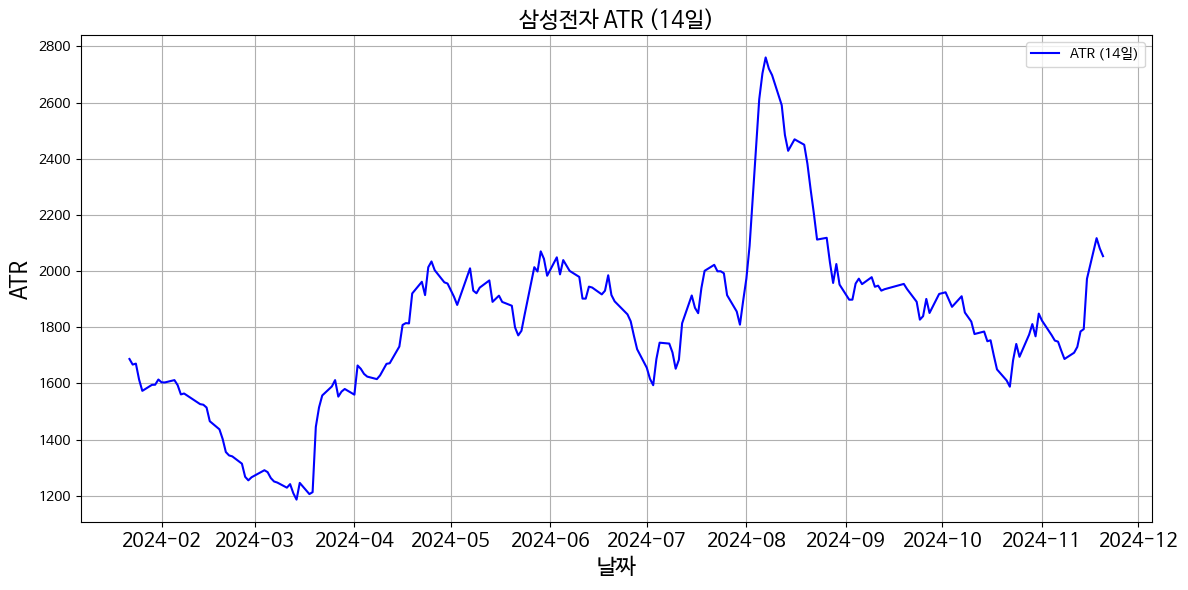

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# 삼성전자 종목 코드 (005930)
ticker = '005930'
name = '삼성전자'

start_date = "2024-01-01"
end_date = "2024-11-20"

# 특정 종목의 주식 데이터 가져오기 (pykrx 사용)
try:
    df_krx = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)
    
    # 필요한 정보만 추출
    if {'종가', '고가', '저가', '시가'} <= set(df_krx.columns):
        df_krx = df_krx[['종가', '고가', '저가', '시가']]
    elif {'Close', 'High', 'Low', 'Open'} <= set(df_krx.columns):
        df_krx = df_krx[['Close', 'High', 'Low', 'Open']]
    df_krx = df_krx.reset_index()
    df_krx['ticker'] = ticker
    df_krx['name'] = name
    df_krx.rename(columns={'종가': 'close', '고가': 'high', '저가': 'low', '시가': 'open', 
                           'Close': 'close', 'High': 'high', 'Low': 'low', 'Open': 'open',
                           '날짜': 'date', 'Date': 'date'}, inplace=True)

    # ATR 추가 (14일 기준)
    import pandas_ta as ta
    df_krx['ATR_14'] = ta.atr(df_krx['high'], df_krx['low'], df_krx['close'], length=14)

    # 그래프로 출력
    plt.figure(figsize=(12, 6))
    plt.plot(df_krx['date'], df_krx['ATR_14'], label='ATR (14일)', color='blue')
    plt.title('삼성전자 ATR (14일)', fontsize=16)
    plt.xlabel('날짜', fontsize=16)
    plt.ylabel('ATR', fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=0, fontsize=14)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error retrieving data for ticker {ticker}: {e}")


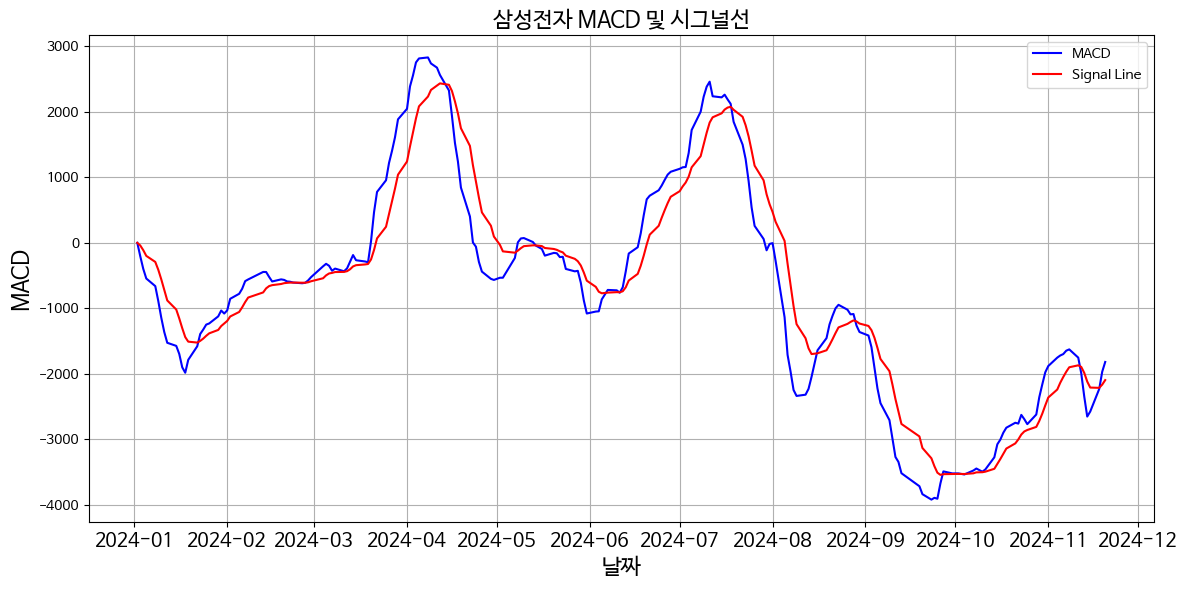

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# 삼성전자 종목 코드 (005930)
ticker = '005930'
name = '삼성전자'

start_date = "2024-01-01"
end_date = "2024-11-20"

# 특정 종목의 주식 데이터 가져오기 (pykrx 사용)
try:
    df_krx = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)
    
    # 필요한 정보만 추출
    if '종가' in df_krx.columns:
        df_krx = df_krx[['종가']]
    elif 'Close' in df_krx.columns:
        df_krx = df_krx[['Close']]
    df_krx = df_krx.reset_index()
    df_krx['ticker'] = ticker
    df_krx['name'] = name
    df_krx.rename(columns={'종가': 'close', '날짜': 'date', 'Close': 'close', 'Date': 'date'}, inplace=True)

    # MACD 추가 (12, 26, 9)
    df_krx['ema_12'] = df_krx['close'].ewm(span=12, adjust=False).mean()
    df_krx['ema_26'] = df_krx['close'].ewm(span=26, adjust=False).mean()
    df_krx['MACD'] = df_krx['ema_12'] - df_krx['ema_26']
    df_krx['Signal_Line'] = df_krx['MACD'].ewm(span=9, adjust=False).mean()

    # 그래프로 출력
    plt.figure(figsize=(12, 6))
    plt.plot(df_krx['date'], df_krx['MACD'], label='MACD', color='blue')
    plt.plot(df_krx['date'], df_krx['Signal_Line'], label='Signal Line', color='red')
    plt.title('삼성전자 MACD 및 시그널선', fontsize=16)
    plt.xlabel('날짜', fontsize=16)
    plt.ylabel('MACD', fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=0, fontsize=14)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error retrieving data for ticker {ticker}: {e}")


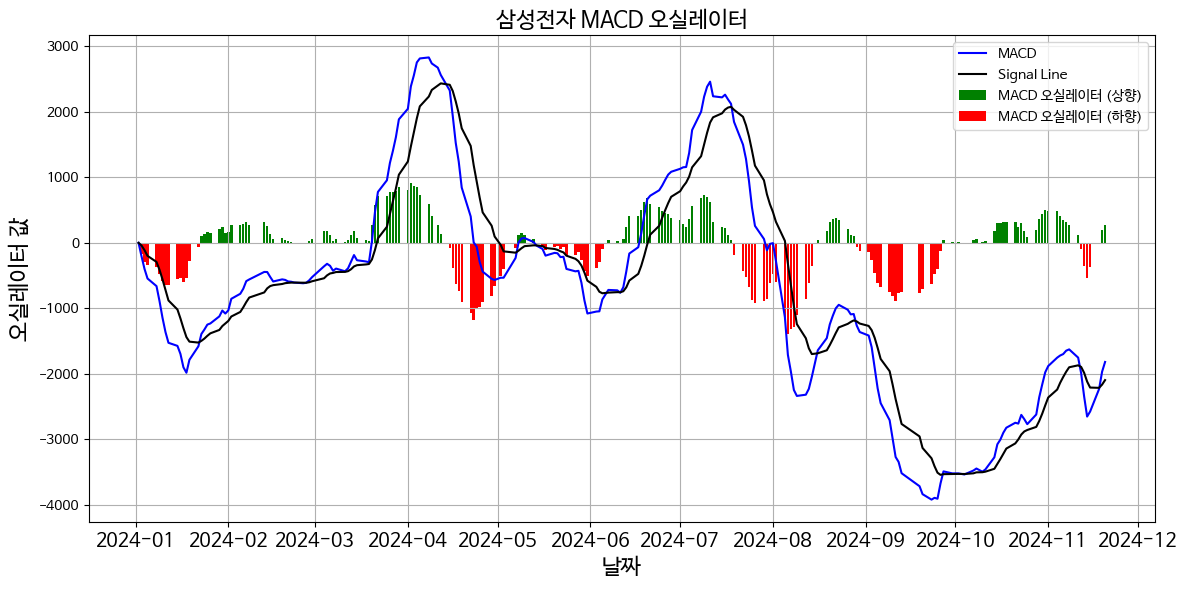

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# 삼성전자 종목 코드 (005930)
ticker = '005930'
name = '삼성전자'

start_date = "2024-01-01"
end_date = "2024-11-20"

# 특정 종목의 주식 데이터 가져오기 (pykrx 사용)
try:
    df_krx = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)
    
    # 필요한 정보만 추출
    if '종가' in df_krx.columns:
        df_krx = df_krx[['종가']]
    elif 'Close' in df_krx.columns:
        df_krx = df_krx[['Close']]
    df_krx = df_krx.reset_index()
    df_krx['ticker'] = ticker
    df_krx['name'] = name
    df_krx.rename(columns={'종가': 'close', '날짜': 'date', 'Close': 'close', 'Date': 'date'}, inplace=True)

    # MACD 오실레이터 추가 (12, 26, 9)
    df_krx['ema_12'] = df_krx['close'].ewm(span=12, adjust=False).mean()
    df_krx['ema_26'] = df_krx['close'].ewm(span=26, adjust=False).mean()
    df_krx['MACD'] = df_krx['ema_12'] - df_krx['ema_26']
    df_krx['Signal_Line'] = df_krx['MACD'].ewm(span=9, adjust=False).mean()
    df_krx['MACD_Oscillator'] = df_krx['MACD'] - df_krx['Signal_Line']

    # MACD 오실레이터 양수 및 음수 구분
    positive_oscillator = df_krx['MACD_Oscillator'].where(df_krx['MACD_Oscillator'] > 0, 0)
    negative_oscillator = df_krx['MACD_Oscillator'].where(df_krx['MACD_Oscillator'] < 0, 0)

    # 그래프로 출력
    plt.figure(figsize=(12, 6))
    plt.bar(df_krx['date'], positive_oscillator, label='MACD 오실레이터 (상향)', color='green')
    plt.bar(df_krx['date'], negative_oscillator, label='MACD 오실레이터 (하향)', color='red')
    plt.plot(df_krx['date'], df_krx['MACD'], label='MACD', color='blue')
    plt.plot(df_krx['date'], df_krx['Signal_Line'], label='Signal Line', color='black')
    plt.title('삼성전자 MACD 오실레이터', fontsize=16)
    plt.xlabel('날짜', fontsize=16)
    plt.ylabel('오실레이터 값', fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=0, fontsize=14)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error retrieving data for ticker {ticker}: {e}")


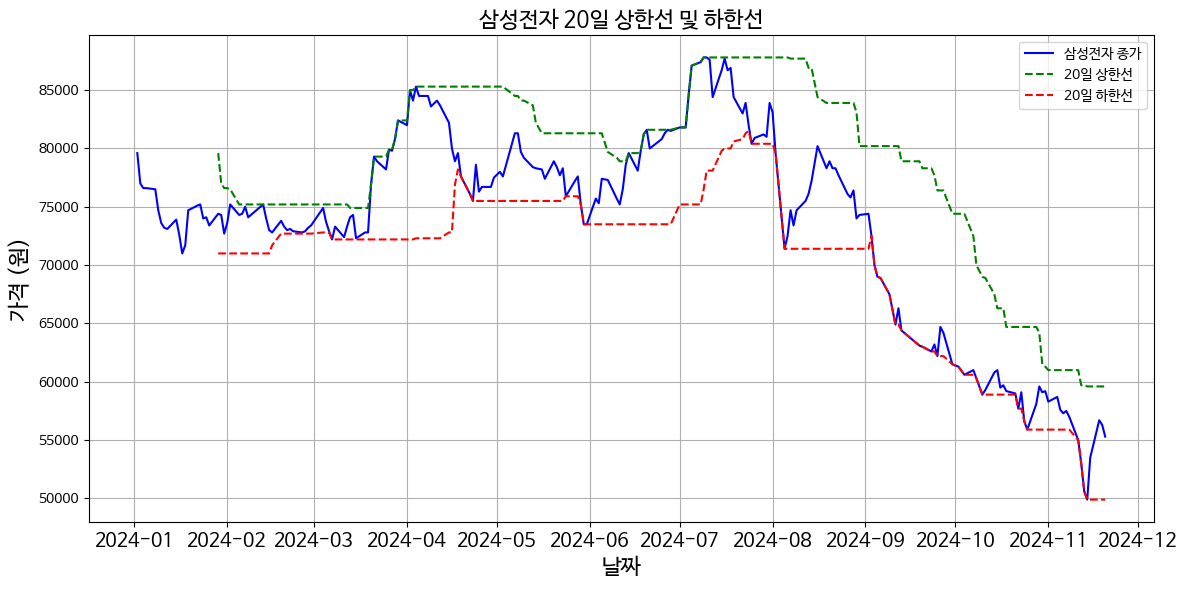

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# 삼성전자 종목 코드 (005930)
ticker = '005930'
name = '삼성전자'

start_date = "2024-01-01"
end_date = "2024-11-20"

# 특정 종목의 주식 데이터 가져오기 (pykrx 사용)
try:
    df_krx = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)
    
    # 필요한 정보만 추출
    if '종가' in df_krx.columns:
        df_krx = df_krx[['종가']]
    elif 'Close' in df_krx.columns:
        df_krx = df_krx[['Close']]
    df_krx = df_krx.reset_index()
    df_krx['ticker'] = ticker
    df_krx['name'] = name
    df_krx.rename(columns={'종가': 'close', '날짜': 'date', 'Close': 'close', 'Date': 'date'}, inplace=True)

    # 하한선/상한선 추가
    df_krx['upper_bound'] = df_krx['close'].rolling(window=20).max()
    df_krx['lower_bound'] = df_krx['close'].rolling(window=20).min()

    # 그래프로 출력
    plt.figure(figsize=(12, 6))
    plt.plot(df_krx['date'], df_krx['close'], label='삼성전자 종가', color='blue')
    plt.plot(df_krx['date'], df_krx['upper_bound'], label='20일 상한선', color='green', linestyle='--')
    plt.plot(df_krx['date'], df_krx['lower_bound'], label='20일 하한선', color='red', linestyle='--')
    plt.title('삼성전자 20일 상한선 및 하한선', fontsize=16)
    plt.xlabel('날짜', fontsize=16)
    plt.ylabel('가격 (원)', fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=0, fontsize=14)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error retrieving data for ticker {ticker}: {e}")


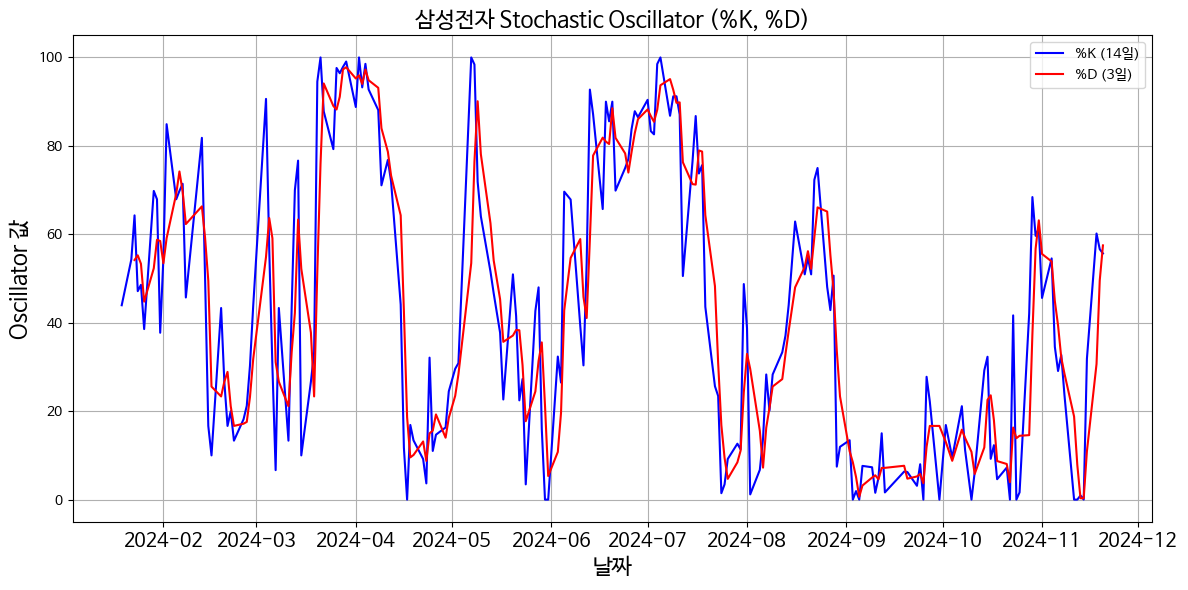

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# 삼성전자 종목 코드 (005930)
ticker = '005930'
name = '삼성전자'

start_date = "2024-01-01"
end_date = "2024-11-20"

# 특정 종목의 주식 데이터 가져오기 (pykrx 사용)
try:
    df_krx = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)
    
    # 필요한 정보만 추출
    if {'종가', '고가', '저가'} <= set(df_krx.columns):
        df_krx = df_krx[['종가', '고가', '저가']]
    elif {'Close', 'High', 'Low'} <= set(df_krx.columns):
        df_krx = df_krx[['Close', 'High', 'Low']]
    df_krx = df_krx.reset_index()
    df_krx['ticker'] = ticker
    df_krx['name'] = name
    df_krx.rename(columns={'종가': 'close', '고가': 'high', '저가': 'low',
                           'Close': 'close', 'High': 'high', 'Low': 'low',
                           '날짜': 'date', 'Date': 'date'}, inplace=True)

    # Stochastic Oscillator %K, %D 추가 (14일 기준)
    low_14 = df_krx['low'].rolling(window=14).min()
    high_14 = df_krx['high'].rolling(window=14).max()
    df_krx['%K'] = ((df_krx['close'] - low_14) / (high_14 - low_14)) * 100
    df_krx['%D'] = df_krx['%K'].rolling(window=3).mean()

    # 그래프로 출력
    plt.figure(figsize=(12, 6))
    plt.plot(df_krx['date'], df_krx['%K'], label='%K (14일)', color='blue')
    plt.plot(df_krx['date'], df_krx['%D'], label='%D (3일)', color='red')
    plt.title('삼성전자 Stochastic Oscillator (%K, %D)', fontsize=16)
    plt.xlabel('날짜', fontsize=16)
    plt.ylabel('Oscillator 값', fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=0, fontsize=14)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error retrieving data for ticker {ticker}: {e}")


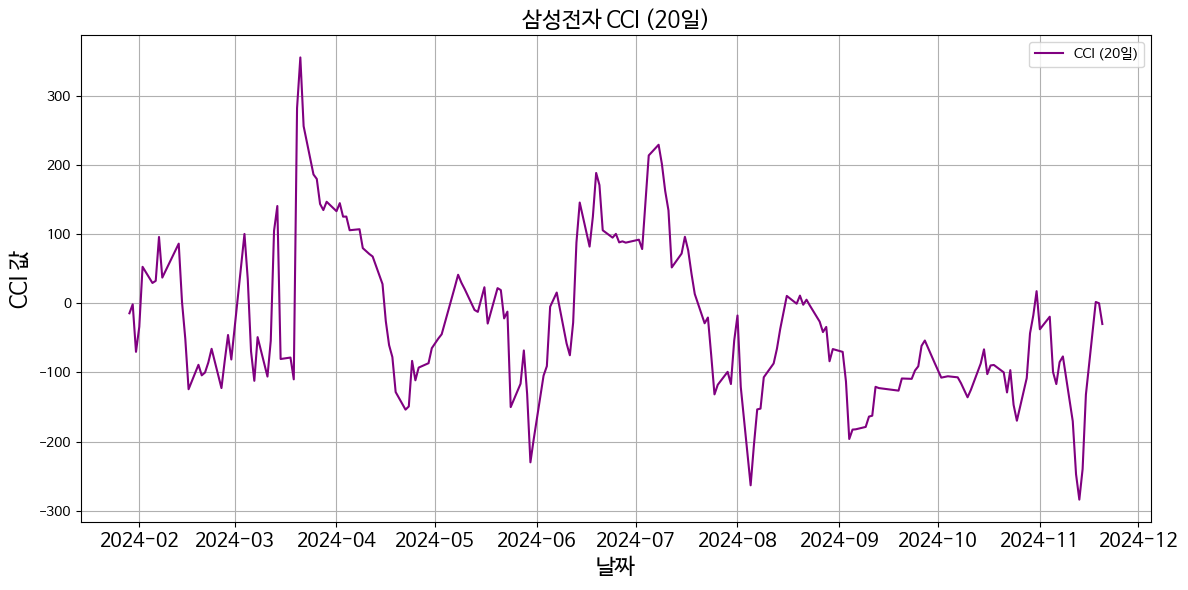

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# 삼성전자 종목 코드 (005930)
ticker = '005930'
name = '삼성전자'

start_date = "2024-01-01"
end_date = "2024-11-20"

# 특정 종목의 주식 데이터 가져오기 (pykrx 사용)
try:
    df_krx = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)
    
    # 필요한 정보만 추출
    if {'종가', '고가', '저가'} <= set(df_krx.columns):
        df_krx = df_krx[['종가', '고가', '저가']]
    elif {'Close', 'High', 'Low'} <= set(df_krx.columns):
        df_krx = df_krx[['Close', 'High', 'Low']]
    df_krx = df_krx.reset_index()
    df_krx['ticker'] = ticker
    df_krx['name'] = name
    df_krx.rename(columns={'종가': 'close', '고가': 'high', '저가': 'low',
                           'Close': 'close', 'High': 'high', 'Low': 'low',
                           '날짜': 'date', 'Date': 'date'}, inplace=True)

    # CCI 추가 (20일 기준)
    tp = (df_krx['high'] + df_krx['low'] + df_krx['close']) / 3
    ma = tp.rolling(window=20).mean()
    md = tp.rolling(window=20).apply(lambda x: (x - x.mean()).abs().mean())
    df_krx['CCI'] = (tp - ma) / (0.015 * md)

    # 그래프로 출력
    plt.figure(figsize=(12, 6))
    plt.plot(df_krx['date'], df_krx['CCI'], label='CCI (20일)', color='purple')
    plt.title('삼성전자 CCI (20일)', fontsize=16)
    plt.xlabel('날짜', fontsize=16)
    plt.ylabel('CCI 값', fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=0, fontsize=14)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error retrieving data for ticker {ticker}: {e}")


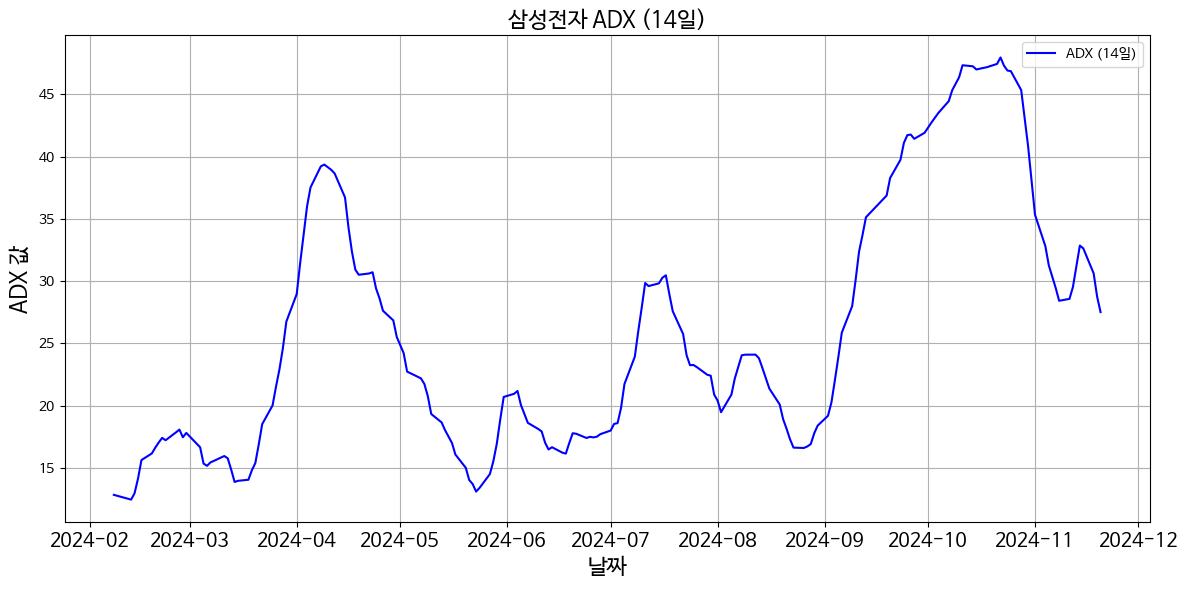

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# 삼성전자 종목 코드 (005930)
ticker = '005930'
name = '삼성전자'

start_date = "2024-01-01"
end_date = "2024-11-20"

# 특정 종목의 주식 데이터 가져오기 (pykrx 사용)
try:
    df_krx = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)
    
    # 필요한 정보만 추출
    if {'종가', '고가', '저가'} <= set(df_krx.columns):
        df_krx = df_krx[['종가', '고가', '저가']]
    elif {'Close', 'High', 'Low'} <= set(df_krx.columns):
        df_krx = df_krx[['Close', 'High', 'Low']]
    df_krx = df_krx.reset_index()
    df_krx['ticker'] = ticker
    df_krx['name'] = name
    df_krx.rename(columns={'종가': 'close', '고가': 'high', '저가': 'low',
                           'Close': 'close', 'High': 'high', 'Low': 'low',
                           '날짜': 'date', 'Date': 'date'}, inplace=True)

    # ADX 추가 (14일 기준, pandas_ta 사용)
    import pandas_ta as ta
    df_krx['ADX_14'] = ta.adx(df_krx['high'], df_krx['low'], df_krx['close'], length=14)['ADX_14']

    # 그래프로 출력
    plt.figure(figsize=(12, 6))
    plt.plot(df_krx['date'], df_krx['ADX_14'], label='ADX (14일)', color='blue')
    plt.title('삼성전자 ADX (14일)', fontsize=16)
    plt.xlabel('날짜', fontsize=16)
    plt.ylabel('ADX 값', fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=0, fontsize=14)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error retrieving data for ticker {ticker}: {e}")


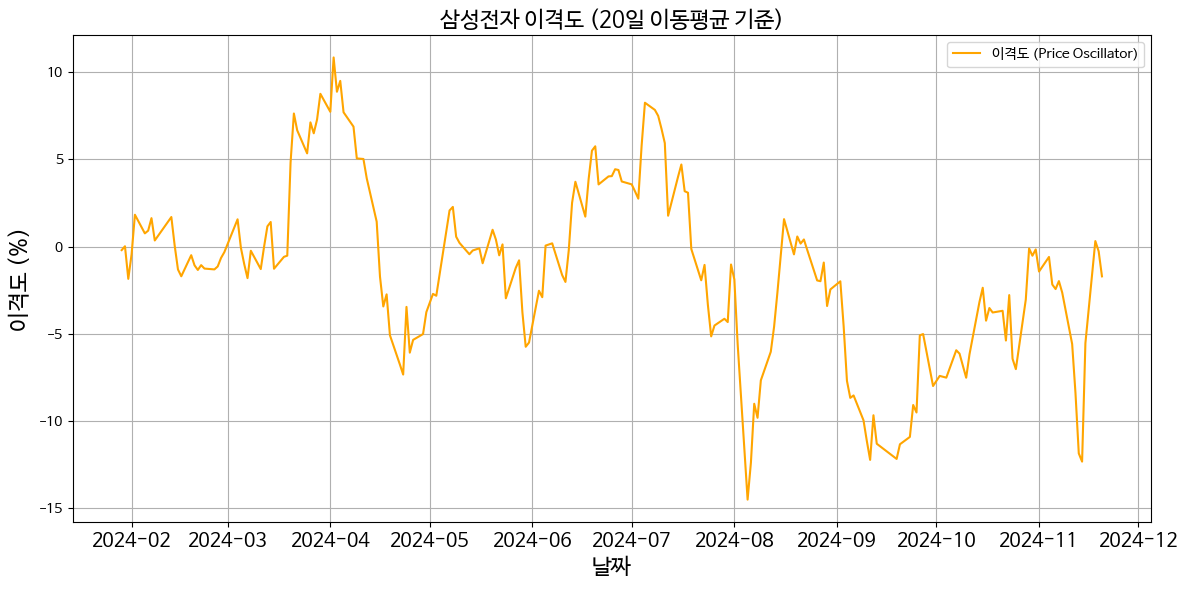

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# 삼성전자 종목 코드 (005930)
ticker = '005930'
name = '삼성전자'

start_date = "2024-01-01"
end_date = "2024-11-20"

# 특정 종목의 주식 데이터 가져오기 (pykrx 사용)
try:
    df_krx = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)
    
    # 필요한 정보만 추출
    if '종가' in df_krx.columns:
        df_krx = df_krx[['종가']]
    elif 'Close' in df_krx.columns:
        df_krx = df_krx[['Close']]
    df_krx = df_krx.reset_index()
    df_krx['ticker'] = ticker
    df_krx['name'] = name
    df_krx.rename(columns={'종가': 'close', '날짜': 'date', 'Close': 'close', 'Date': 'date'}, inplace=True)

    # 이격도 추가 (주가와 20일 이동평균선 간의 괴리율 계산)
    df_krx['moving_average_20'] = df_krx['close'].rolling(window=20).mean()
    df_krx['Price_Oscillator'] = ((df_krx['close'] - df_krx['moving_average_20']) / df_krx['moving_average_20']) * 100

    # 그래프로 출력
    plt.figure(figsize=(12, 6))
    plt.plot(df_krx['date'], df_krx['Price_Oscillator'], label='이격도 (Price Oscillator)', color='orange')
    plt.title('삼성전자 이격도 (20일 이동평균 기준)', fontsize=16)
    plt.xlabel('날짜', fontsize=16)
    plt.ylabel('이격도 (%)', fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=0, fontsize=14)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error retrieving data for ticker {ticker}: {e}")


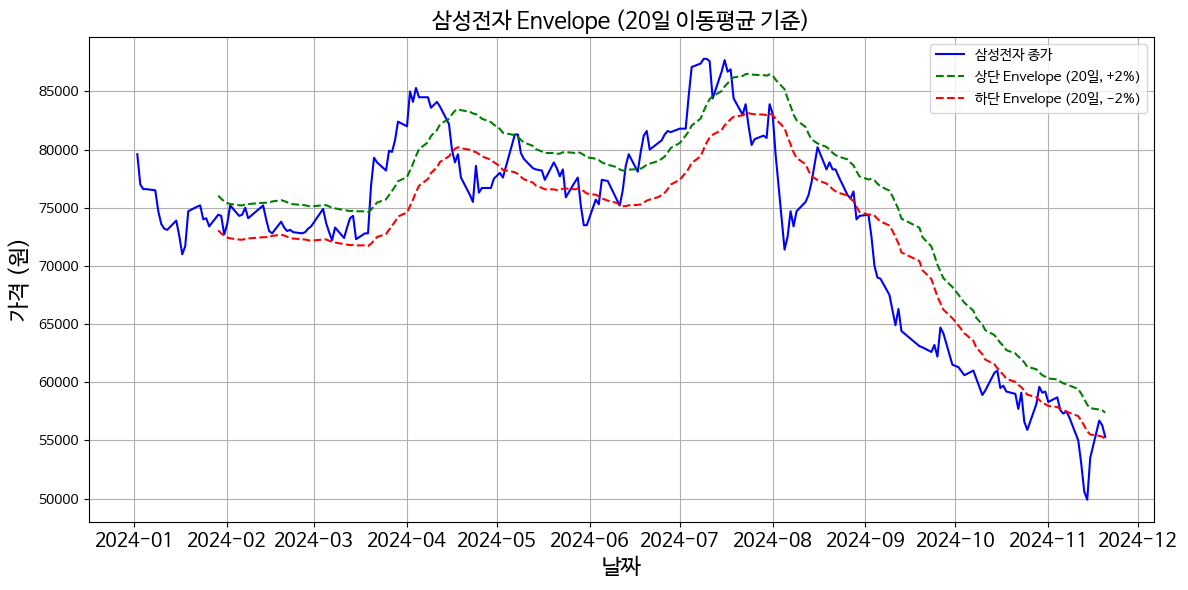

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# 삼성전자 종목 코드 (005930)
ticker = '005930'
name = '삼성전자'

start_date = "2024-01-01"
end_date = "2024-11-20"

# 특정 종목의 주식 데이터 가져오기 (pykrx 사용)
try:
    df_krx = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)
    
    # 필요한 정보만 추출
    if '종가' in df_krx.columns:
        df_krx = df_krx[['종가']]
    elif 'Close' in df_krx.columns:
        df_krx = df_krx[['Close']]
    df_krx = df_krx.reset_index()
    df_krx['ticker'] = ticker
    df_krx['name'] = name
    df_krx.rename(columns={'종가': 'close', '날짜': 'date', 'Close': 'close', 'Date': 'date'}, inplace=True)

    # Envelope 추가 (20일 이동평균을 기준으로 상/하 2%의 Envelope 계산)
    df_krx['moving_average_20'] = df_krx['close'].rolling(window=20).mean()
    df_krx['upper_envelope'] = df_krx['moving_average_20'] * 1.02
    df_krx['lower_envelope'] = df_krx['moving_average_20'] * 0.98

    # 그래프로 출력
    plt.figure(figsize=(12, 6))
    plt.plot(df_krx['date'], df_krx['close'], label='삼성전자 종가', color='blue')
    plt.plot(df_krx['date'], df_krx['upper_envelope'], label='상단 Envelope (20일, +2%)', color='green', linestyle='--')
    plt.plot(df_krx['date'], df_krx['lower_envelope'], label='하단 Envelope (20일, -2%)', color='red', linestyle='--')
    plt.title('삼성전자 Envelope (20일 이동평균 기준)', fontsize=16)
    plt.xlabel('날짜', fontsize=16)
    plt.ylabel('가격 (원)', fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=0, fontsize=14)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error retrieving data for ticker {ticker}: {e}")


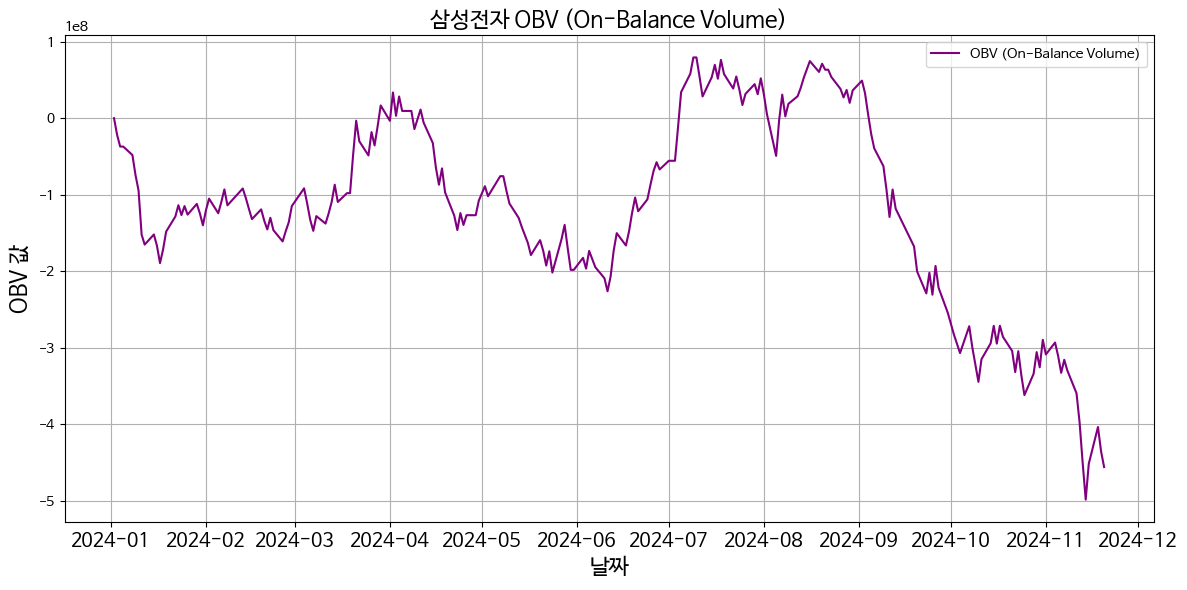

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# 삼성전자 종목 코드 (005930)
ticker = '005930'
name = '삼성전자'

start_date = "2024-01-01"
end_date = "2024-11-20"

# 특정 종목의 주식 데이터 가져오기 (pykrx 사용)
try:
    df_krx = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)
    
    # 필요한 정보만 추출
    if {'종가', '거래량'} <= set(df_krx.columns):
        df_krx = df_krx[['종가', '거래량']]
    elif {'Close', 'Volume'} <= set(df_krx.columns):
        df_krx = df_krx[['Close', 'Volume']]
    df_krx = df_krx.reset_index()
    df_krx['ticker'] = ticker
    df_krx['name'] = name
    df_krx.rename(columns={'종가': 'close', '거래량': 'volume', 'Close': 'close', 'Volume': 'volume', 
                           '날짜': 'date', 'Date': 'date'}, inplace=True)

    # OBV 추가
    df_krx['OBV'] = 0
    df_krx['OBV'] = df_krx.apply(lambda row: row['volume'] if row['close'] > df_krx['close'].shift(1)[row.name] else 
                                 -row['volume'] if row['close'] < df_krx['close'].shift(1)[row.name] else 0, axis=1)
    df_krx['OBV'] = df_krx['OBV'].cumsum()

    # 그래프로 출력
    plt.figure(figsize=(12, 6))
    plt.plot(df_krx['date'], df_krx['OBV'], label='OBV (On-Balance Volume)', color='purple')
    plt.title('삼성전자 OBV (On-Balance Volume)', fontsize=16)
    plt.xlabel('날짜', fontsize=16)
    plt.ylabel('OBV 값', fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=0, fontsize=14)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error retrieving data for ticker {ticker}: {e}")


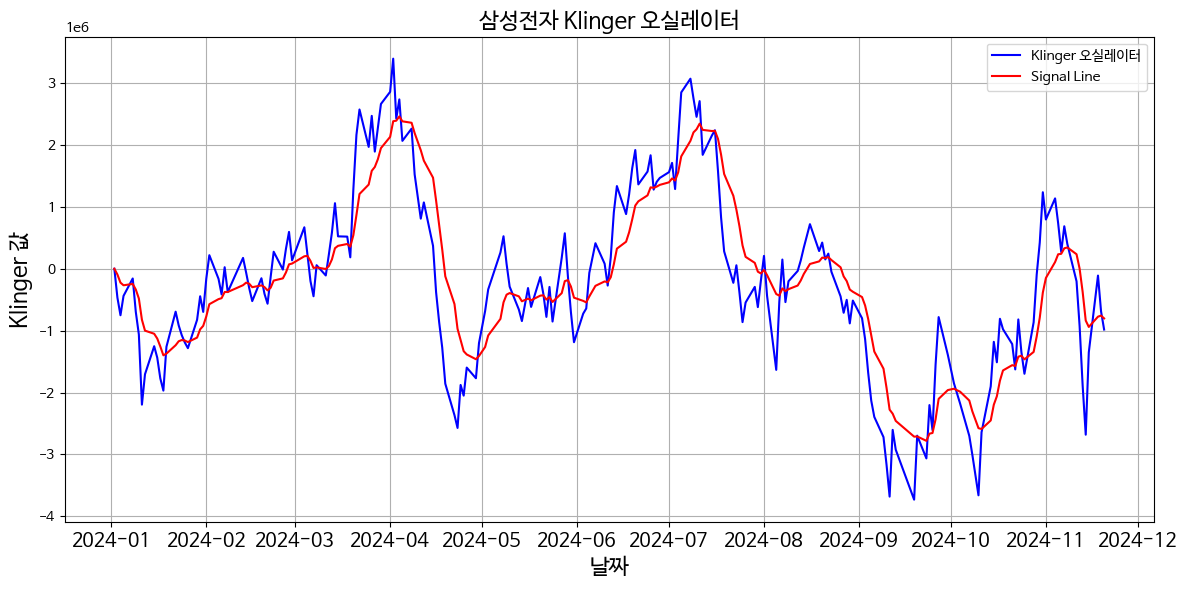

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# 삼성전자 종목 코드 (005930)
ticker = '005930'
name = '삼성전자'

start_date = "2024-01-01"
end_date = "2024-11-20"

# 특정 종목의 주식 데이터 가져오기 (pykrx 사용)
try:
    df_krx = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)
    
    # 필요한 정보만 추출
    if {'종가', '고가', '저가', '거래량'} <= set(df_krx.columns):
        df_krx = df_krx[['종가', '고가', '저가', '거래량']]
    elif {'Close', 'High', 'Low', 'Volume'} <= set(df_krx.columns):
        df_krx = df_krx[['Close', 'High', 'Low', 'Volume']]
    df_krx = df_krx.reset_index()
    df_krx['ticker'] = ticker
    df_krx['name'] = name
    df_krx.rename(columns={'종가': 'close', '고가': 'high', '저가': 'low', '거래량': 'volume',
                           'Close': 'close', 'High': 'high', 'Low': 'low', 'Volume': 'volume',
                           '날짜': 'date', 'Date': 'date'}, inplace=True)

    # Klinger 오실레이터 계산
    typical_price = (df_krx['high'] + df_krx['low'] + df_krx['close']) / 3
    trend = typical_price.diff()
    df_krx['volume_flow'] = df_krx['volume'] * trend.apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

    df_krx['short_ema'] = df_krx['volume_flow'].ewm(span=34, adjust=False).mean()
    df_krx['long_ema'] = df_krx['volume_flow'].ewm(span=55, adjust=False).mean()
    df_krx['Klinger'] = df_krx['short_ema'] - df_krx['long_ema']
    df_krx['Signal_Line'] = df_krx['Klinger'].ewm(span=9, adjust=False).mean()

    # 그래프로 출력
    plt.figure(figsize=(12, 6))
    plt.plot(df_krx['date'], df_krx['Klinger'], label='Klinger 오실레이터', color='blue')
    plt.plot(df_krx['date'], df_krx['Signal_Line'], label='Signal Line', color='red')
    plt.title('삼성전자 Klinger 오실레이터', fontsize=16)
    plt.xlabel('날짜', fontsize=16)
    plt.ylabel('Klinger 값', fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=0, fontsize=14)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error retrieving data for ticker {ticker}: {e}")


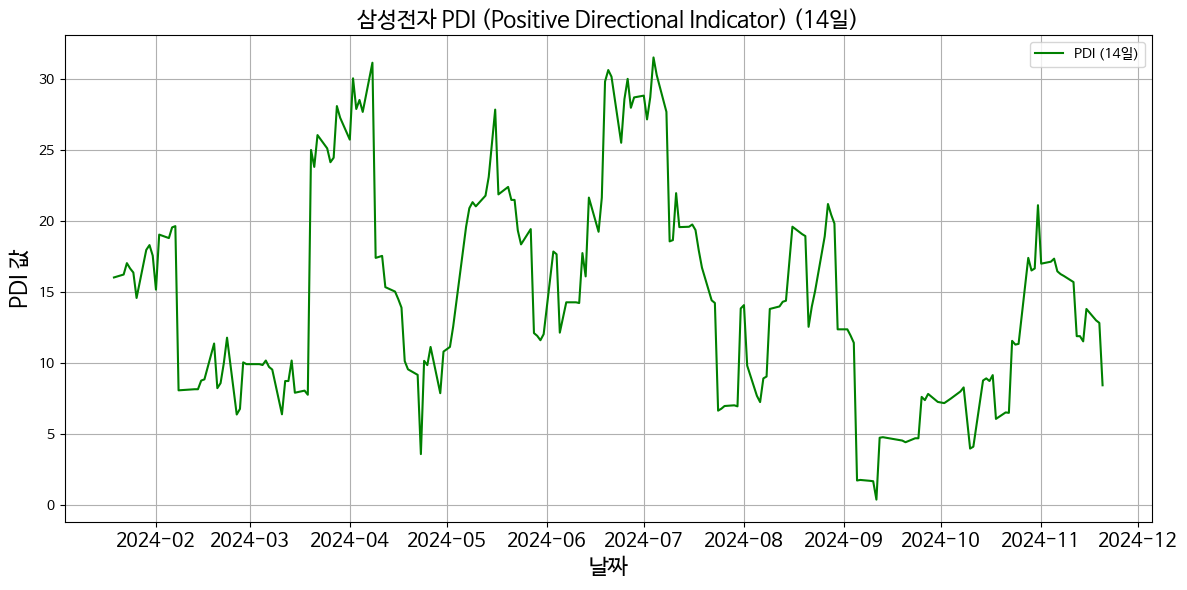

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# 삼성전자 종목 코드 (005930)
ticker = '005930'
name = '삼성전자'

start_date = "2024-01-01"
end_date = "2024-11-20"

# 특정 종목의 주식 데이터 가져오기 (pykrx 사용)
try:
    df_krx = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)
    
    # 필요한 정보만 추출
    if {'종가', '고가', '저가'} <= set(df_krx.columns):
        df_krx = df_krx[['종가', '고가', '저가']]
    elif {'Close', 'High', 'Low'} <= set(df_krx.columns):
        df_krx = df_krx[['Close', 'High', 'Low']]
    df_krx = df_krx.reset_index()
    df_krx['ticker'] = ticker
    df_krx['name'] = name
    df_krx.rename(columns={'종가': 'close', '고가': 'high', '저가': 'low',
                           'Close': 'close', 'High': 'high', 'Low': 'low',
                           '날짜': 'date', 'Date': 'date'}, inplace=True)

    # PDI (Positive Directional Indicator) 계산 (14일 기준)
    df_krx['high_diff'] = df_krx['high'].diff()
    df_krx['low_diff'] = df_krx['low'].diff()

    df_krx['+DM'] = df_krx.apply(lambda row: row['high_diff'] if row['high_diff'] > row['low_diff'] and row['high_diff'] > 0 else 0, axis=1)
    df_krx['TR'] = df_krx[['high', 'low', 'close']].apply(lambda x: max(x['high'] - x['low'], abs(x['high'] - df_krx['close'].shift(1)[x.name]), abs(x['low'] - df_krx['close'].shift(1)[x.name])), axis=1)

    df_krx['TR_14'] = df_krx['TR'].rolling(window=14).sum()
    df_krx['+DM_14'] = df_krx['+DM'].rolling(window=14).sum()

    df_krx['PDI_14'] = (df_krx['+DM_14'] / df_krx['TR_14']) * 100

    # 그래프로 출력
    plt.figure(figsize=(12, 6))
    plt.plot(df_krx['date'], df_krx['PDI_14'], label='PDI (14일)', color='green')
    plt.title('삼성전자 PDI (Positive Directional Indicator) (14일)', fontsize=16)
    plt.xlabel('날짜', fontsize=16)
    plt.ylabel('PDI 값', fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=0, fontsize=14)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error retrieving data for ticker {ticker}: {e}")


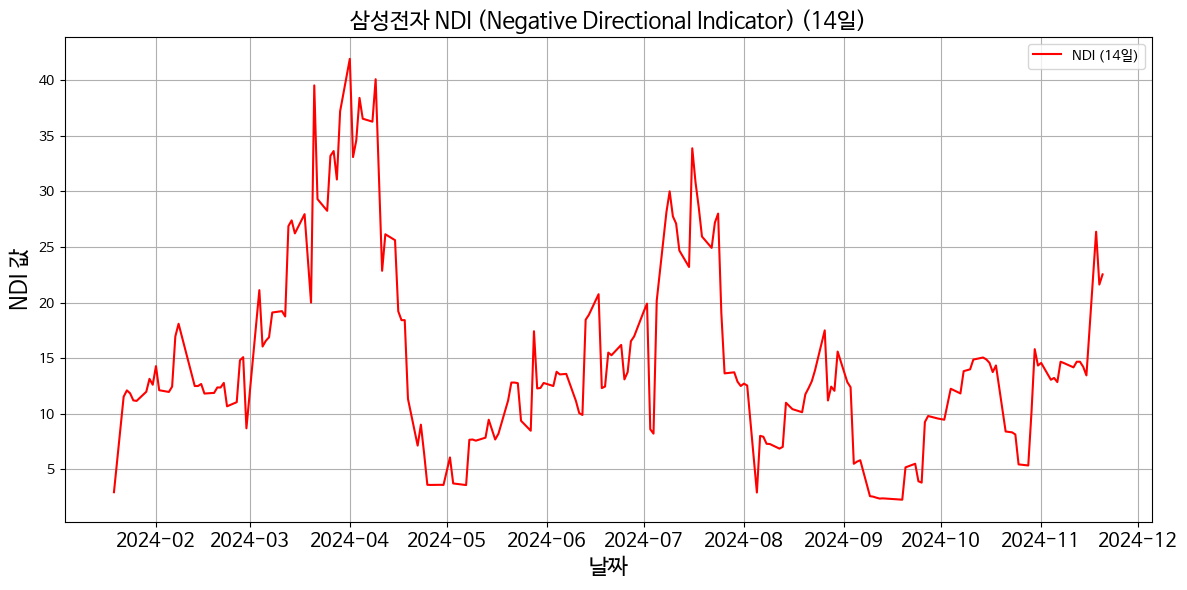

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# 삼성전자 종목 코드 (005930)
ticker = '005930'
name = '삼성전자'

start_date = "2024-01-01"
end_date = "2024-11-20"

# 특정 종목의 주식 데이터 가져오기 (pykrx 사용)
try:
    df_krx = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)
    
    # 필요한 정보만 추출
    if {'종가', '고가', '저가'} <= set(df_krx.columns):
        df_krx = df_krx[['종가', '고가', '저가']]
    elif {'Close', 'High', 'Low'} <= set(df_krx.columns):
        df_krx = df_krx[['Close', 'High', 'Low']]
    df_krx = df_krx.reset_index()
    df_krx['ticker'] = ticker
    df_krx['name'] = name
    df_krx.rename(columns={'종가': 'close', '고가': 'high', '저가': 'low',
                           'Close': 'close', 'High': 'high', 'Low': 'low',
                           '날짜': 'date', 'Date': 'date'}, inplace=True)

    # NDI (Negative Directional Indicator) 계산 (14일 기준)
    df_krx['high_diff'] = df_krx['high'].diff()
    df_krx['low_diff'] = df_krx['low'].diff()

    df_krx['-DM'] = df_krx.apply(lambda row: row['low_diff'] if row['low_diff'] > row['high_diff'] and row['low_diff'] > 0 else 0, axis=1)
    df_krx['TR'] = df_krx[['high', 'low', 'close']].apply(lambda x: max(x['high'] - x['low'], abs(x['high'] - df_krx['close'].shift(1)[x.name]), abs(x['low'] - df_krx['close'].shift(1)[x.name])), axis=1)

    df_krx['TR_14'] = df_krx['TR'].rolling(window=14).sum()
    df_krx['-DM_14'] = df_krx['-DM'].rolling(window=14).sum()

    df_krx['NDI_14'] = (df_krx['-DM_14'] / df_krx['TR_14']) * 100

    # 그래프로 출력
    plt.figure(figsize=(12, 6))
    plt.plot(df_krx['date'], df_krx['NDI_14'], label='NDI (14일)', color='red')
    plt.title('삼성전자 NDI (Negative Directional Indicator) (14일)', fontsize=16)
    plt.xlabel('날짜', fontsize=16)
    plt.ylabel('NDI 값', fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=0, fontsize=14)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error retrieving data for ticker {ticker}: {e}")


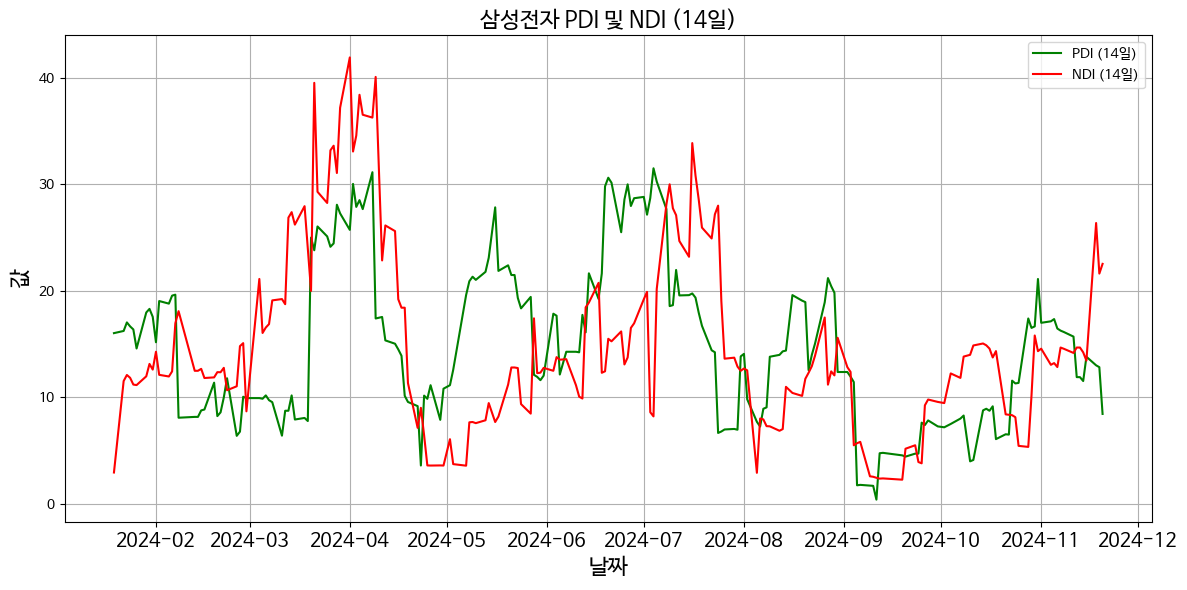

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# 삼성전자 종목 코드 (005930)
ticker = '005930'
name = '삼성전자'

start_date = "2024-01-01"
end_date = "2024-11-20"

# 특정 종목의 주식 데이터 가져오기 (pykrx 사용)
try:
    df_krx = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)
    
    # 필요한 정보만 추출
    if {'종가', '고가', '저가'} <= set(df_krx.columns):
        df_krx = df_krx[['종가', '고가', '저가']]
    elif {'Close', 'High', 'Low'} <= set(df_krx.columns):
        df_krx = df_krx[['Close', 'High', 'Low']]
    df_krx = df_krx.reset_index()
    df_krx['ticker'] = ticker
    df_krx['name'] = name
    df_krx.rename(columns={'종가': 'close', '고가': 'high', '저가': 'low',
                           'Close': 'close', 'High': 'high', 'Low': 'low',
                           '날짜': 'date', 'Date': 'date'}, inplace=True)

    # PDI (Positive Directional Indicator) 및 NDI (Negative Directional Indicator) 계산 (14일 기준)
    df_krx['high_diff'] = df_krx['high'].diff()
    df_krx['low_diff'] = df_krx['low'].diff()

    df_krx['+DM'] = df_krx.apply(lambda row: row['high_diff'] if row['high_diff'] > row['low_diff'] and row['high_diff'] > 0 else 0, axis=1)
    df_krx['-DM'] = df_krx.apply(lambda row: row['low_diff'] if row['low_diff'] > row['high_diff'] and row['low_diff'] > 0 else 0, axis=1)
    df_krx['TR'] = df_krx[['high', 'low', 'close']].apply(lambda x: max(x['high'] - x['low'], abs(x['high'] - df_krx['close'].shift(1)[x.name]), abs(x['low'] - df_krx['close'].shift(1)[x.name])), axis=1)

    df_krx['TR_14'] = df_krx['TR'].rolling(window=14).sum()
    df_krx['+DM_14'] = df_krx['+DM'].rolling(window=14).sum()
    df_krx['-DM_14'] = df_krx['-DM'].rolling(window=14).sum()

    df_krx['PDI_14'] = (df_krx['+DM_14'] / df_krx['TR_14']) * 100
    df_krx['NDI_14'] = (df_krx['-DM_14'] / df_krx['TR_14']) * 100

    # 그래프로 출력
    plt.figure(figsize=(12, 6))
    plt.plot(df_krx['date'], df_krx['PDI_14'], label='PDI (14일)', color='green')
    plt.plot(df_krx['date'], df_krx['NDI_14'], label='NDI (14일)', color='red')
    plt.title('삼성전자 PDI 및 NDI (14일)', fontsize=16)
    plt.xlabel('날짜', fontsize=16)
    plt.ylabel('값', fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=0, fontsize=14)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error retrieving data for ticker {ticker}: {e}")
